# <center> **Projeto Final - Aprendizado de Máquina** <center>

##### <center> - Análise de dados para previsão da temperatura crítica de supercondutores - <center>

Guerreiros: **Tsuru** (Júlia Guedes Almeida dos Santos), **Pólux** (Raquel de Godoy Vianna) e **Tiles** (Thalles José de Souza Cansi).

> Quem ri por último ri melhor.

## 🌃 **Conclusão**

O presente notebook objetiva apresentar a conclusão do projeto realizado, mostrando quais modelos apresentaram melhor desempenho para o dataset escolhido, bem como exprimir por intermédio de um gráfico uma melhor visualização das métricas obtidas.

### 📚 **Importação de bibliotecas**

In [1]:
import pandas as pd
import plotly.io as pio
import plotly.express as px
import plotly.graph_objects as go
import os

### ⏭️ **Dataframe de resultado**

Para realizar a análise, em primeiro lugar, é necessário fazer a importação do dataframe que armazena as estimativas das performances do modelo obtidas.

In [2]:
df_resultado_RMSE = df = pd.read_csv("data/df_resultados_RMSE.csv", sep = ',')
display(df_resultado_RMSE)

,Baseline,Árvore de decisão,Floresta Aleatória,k-NN,Regressão Linear Múltipla,SGD
0,33.887487,14.63461,11.601069,12.46832,17.68313,17.916311


### 📊 **Gráfico**

A partir disso, é possível expressar de forma gráfica tais resultados, comparando as métricas dos modelos treinados nos notebooks de desenvolvimento com o modelo baseline.

In [3]:
colunas = df_resultado_RMSE.columns[1:]
valores_rmse = df_resultado_RMSE.iloc[0, 1:].values

pio.templates.default = "plotly_dark"  

df_plotly = pd.DataFrame({
    'Modelos': colunas,
    'RMSE': valores_rmse
})

fig = px.bar(df_plotly, x='Modelos', y='RMSE', 
             color='RMSE', 
             color_continuous_scale=px.colors.sequential.Blues,
             title="Avaliação do desempenho dos modelos")

baseline_rmse = df_resultado_RMSE.iloc[0, 0]

fig.add_trace(go.Scatter(
    x=colunas,
    y=[baseline_rmse] * len(colunas),  
    mode='lines',
    name='RMSE do Modelo Baseline', 
    line=dict(color='darkviolet', dash='dash', width=4)
))

fig.update_layout(
    xaxis_title="Modelos",
    yaxis_title="RMSE",
    legend_title="RMSE do modelo baseline",
    legend=dict(yanchor="top", y=0.99, xanchor="left", x=0.01)
)

fig.show()


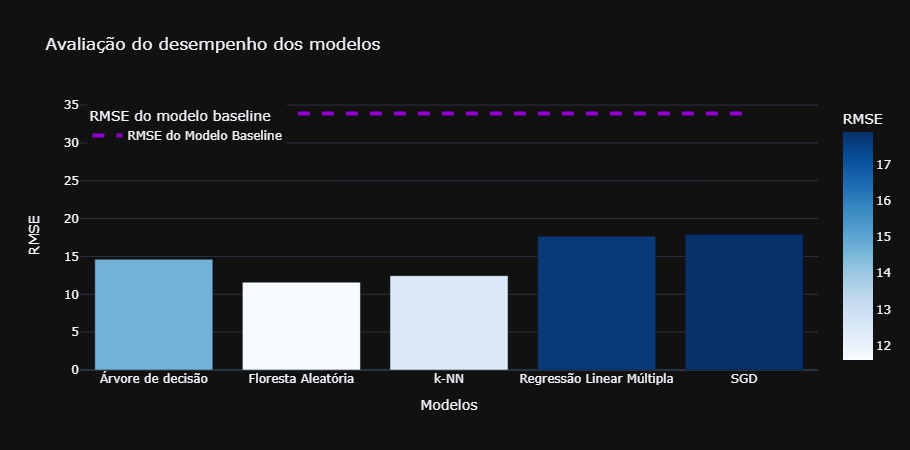

<center> [Gráfico 1: Análise do desempenho dos modelos]

A partir dos resultados apresentados na tabela e da visualização proporcionada pelo gráfico, foi possível concluir algo surpreendente: todos os modelos apresentaram desempenho superior ao da baseline!

Além disso, de maneira geral, pode-se afirmar que os modelos lineares tiveram um desempenho inferior, o que pode indicar que as features não apresentam uma notável linearidade. Por outro lado, a floresta aleatória proporcionou a melhor métrica (11,6 K), o que demonstra que as otimizações realizadas pela biblioteca ``Optuna`` foram eficazes na busca por melhores hiperparâmetros.


### ✅ **Considerações Finais**

O presente projeto, buscou explorar um pouco do universo da supercondutividade, ao tentar prever, através da utilização de 81 atributos, a temperatura crítica de materiais supercondutores.

Em um panorama geral, pode-se dizer que o principal desafio enfrentado foi a grande dimensionalidade do dataset escolhido, dado que técnicas de otimização, tais como Redução Recursiva de Atributos (RFE), Fator de Inflação da Variância (VIF) e Análise de componentes principais (PCA), não proporcionaram melhores resultados, o que pode indicar que os dados possuem baixa correlação e/ou grande parte das features apresentam relevância para os modelos.
Dessa forma, pode-se afirmar que, para o dataset analisado, utilizar todas as colunas pode ser uma boa forma de conseguir obter bons resultados. 

Ademais, o modelo de floresta aleatória, como supracitado, proporcionou um menor valor de RMSE (11.6 K), o que pode indicar que as features possuem relação não linear, a qual é melhor captada por modelos como árvores de decisão (ou florestas, que são formadas por um conjunto delas). 

Finalmente, considerando a robustez das métricas utilizadas, é possível dizer que os modelos apresentaram bom desempenho, em comparação ao modelo baseline.

****

##### Último diário da missão...

Depois de longas missões, muitos encontros e desencontros, erros e acertos (os normalizadores que o digam!) e, principalmente, grande sede por conhecimento, nós - Pólux, Tiles e Tsuru - declaramos que a nossa missão, finalmente, está encerrada. Durante a reunião realizada na cúpula semanal de Ciência, Tecnologia e Encantamentos - os cavaleiros da supernova foram oficialmente promovidos a Pesquisadores Oficiais do Reino de Lumi e, agora, somos portadores da missão de disseminar novos conhecimentos ao povo desse abençoado reino. A partir dessa aproximação após longos diálogos com a elite do Reino de Lumi - incluindo a ilustre participação do grande Rei Milu Iluminarius MLVI e os nobres apoiadores da Guilda dos magos - o modelo de avaliação dos cavaleiros será revisto! Os testes não mais irão contar apenas com metas a serem cumpridas pelos cavaleiros, mas sim irão considerar a individualidde de cada um. Espadas, estratégias, bestas, arco e flecha, defesa. Todas as habilidades serão consideradas para promover o bem-estar dos cidadãos de Lumi. Finalmente todos poderão ter liberdade e devido reconhecimento.

Além disso, não esquecemos da nossa missão original: A memória de Castor ainda vive e utilizando os nossos conhecimentos adquiridos, iremos encontrá-lo. E isso é uma promessa.

``Que o sentimento de insastifação o motive a lutar (com os artifícios que preferir) por uma sociedade mais justa! ⚔️``